# 4.10 Coding Etiquette & Excel Reporting-Part I

### This script contains the following points: 

#### 1.	Import Libraries and Data

#### 2.	Addressing Data Security

#### 3.	Regional segmentation of the data
       3.1 Creation of regional segmentation
       3.2 Spending habits by Region

#### 4.	Low-activity customers flag

#### 5. Customer profiling  & 6. Visualization
        5.1	Age Profile creation and Pie chart visualization
        5.2	Income Profile creation and Pie Chart visualization
        5.3	Family Profile creation and Pie chart visualization
        5.4	Profiling Day of the Week and Bar Chart visualization


#### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
       7.1 Summary statistics of AGE across order frequency and expenditure
       7.2 Summary statistics of INCOME across order frequency and expenditure
       7.3 Summary statistics of FAMILY PROFILE across order frequency and expenditure
       7.4 Summary statistics of DAY OF WEEK across order frequency and expenditure


#### 8. Customer Profiles by Region and Departments 
      8.1 Age Grouping by Region
      8.2 Age Grouping by Department
      8.3 Family Profile by Region
      8.4 Family Profile by Department
      8.5 Income Profile by Region
      8.6 Income Profile by Department
      8.7 Orders Days of Week Profile by Region
      8.8 Orders Days of Week Profile by Department
      


# 1. Import Libraries  and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Set path

path = r"C:\Users\marce\Documents\Instacart Basket Analysis"

In [4]:
# Import opc_merged.pkl

df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opc_merged.pkl'))

# 2. Addresing Data Security

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404161 entries, 0 to 32404160
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              float16 
 7   add_to_cart_order       float16 
 8   reordered               float16 
 9   product_name            object  
 10  aisle_id                int8    
 11  department_id           int8    
 12  prices                  float16 
 13  price_range_loc         object  
 14  busiest_day             object  
 15  busiest_days            object  
 16  busiest_period_of_day   object  
 17  max_order               int8    
 18  loyalty_flag            object  
 19  mean_prices             float32 
 20  spender_level           object  
 21  median

Data contain no PII elements, as the 'first_name' and 'last_name' columns were deleted in the previous lesson


# 3. Regional Segmentation of the data

##  3.1	Creation of regional segmentation

In [5]:
# Assign States within Regions

region = []
for value in df['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        region.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        region.append('Midwest')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        region.append('West')
    else:
        region.append('South')

In [6]:
# Create a new column 'region'

df['region']= region

In [7]:
# Check 'region' column

df['region'].value_counts(dropna = False)

South        10791640
West          8292785
Midwest       7597106
Northeast     5722630
Name: region, dtype: int64

In [10]:
# Finding NaN states

df[df['region'].isnull()]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Frequency_flag,gender,state,age,date_joined,dependants_number,family_status,income,exists,region


## 3.2 Spending habits by Region

In [9]:
# Create crosstab between 'spender_level' and 'region' columns

region_spend = pd.crosstab(df['region'], df['spender_level'], dropna = False)

In [11]:
region_spend.to_clipboard()

In [12]:
region_spend



spender_level,High spender,Low spender
region,,
Midwest,140167,7456939
Northeast,98777,5623853
South,189513,10602127
West,148075,8144710


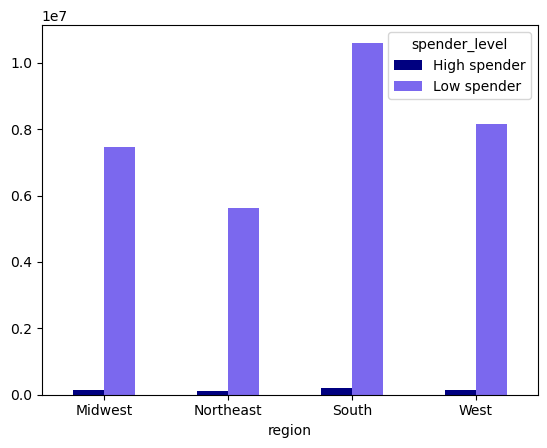

In [13]:
# Create bar chart for spending flag distribution

region_bar = region_spend.plot.bar(rot = 0, color = ['navy', 'mediumslateblue'])

The South region is the region with the most High Spenders and Low spenders, but the Northeast region has the lowest number of High and Low spenders.



In [25]:
# Export the Bar Chart

region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'region_loyalty.png'))

# 4. Low-activity customers 
(customers with less than 5 orders)

In [14]:
# Create low and Regular activity flag
df.loc[df['max_order'] <5, 'activity_level'] = 'low-activity'
df.loc[df['max_order'] >5, 'activity_level'] = 'regular-activity'

In [15]:
# Check the activity flag

df['activity_level'].value_counts(dropna = True)

regular-activity    30170807
low-activity         1440251
Name: activity_level, dtype: int64

In [16]:
# Create a subset without Low-activity customers

df_active_users =df.loc[df['activity_level']== 'regular-activity']



In [17]:
# Check the new subset

df_active_users.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,dependants_number,family_status,income,exists,region,activity_level
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular-activity
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular-activity
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular-activity
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular-activity
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular-activity


In [20]:
# Export the new subset df_active_users

df_active_users.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_users_sample.pkl'))

# 5. Customer profiling & 6. Visualization

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [19]:
df.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_prices,median_freq,age,dependants_number,income
count,3.240416e+07,3.240416e+07,3.240416e+07,3.240416e+07,3.240416e+07,30328107.0,32404161.0,32404161.0,32404161.0,3.240416e+07,3.240416e+07,3.240416e+07,3.240416e+07,3.240416e+07,32404156.0,3.240416e+07,3.240416e+07,3.240416e+07
mean,1.710747e+06,1.029370e+05,1.714238e+01,2.738863e+00,1.342515e+01,NaN,NaN,NaN,NaN,6.449069e+01,9.919661e+00,NaN,3.305239e+01,9.825801e+00,NaN,4.946529e+01,1.501897e+00,9.943519e+04
std,9.872988e+05,5.946618e+04,1.753539e+01,2.090079e+00,4.246385e+00,0.0,NaN,0.0,0.0,4.843859e+01,6.281489e+00,NaN,2.515533e+01,2.690907e+01,0.0,1.848559e+01,1.118865e+00,4.305159e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.0,1.0,0.0,-1.280000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0,13544.0,3.0,0.0,2.400000e+01,4.000000e+00,4.199219e+00,1.300000e+01,7.386535e+00,6.0,3.300000e+01,1.000000e+00,6.700200e+04
50%,1.711053e+06,1.026140e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.0,25296.0,6.0,1.0,7.900000e+01,9.000000e+00,7.398438e+00,2.600000e+01,7.823226e+00,8.0,4.900000e+01,2.000000e+00,9.661500e+04
75%,2.565504e+06,1.543880e+05,2.400000e+01,5.000000e+00,1.600000e+01,15.0,37952.0,11.0,1.0,1.000000e+02,1.600000e+01,1.129688e+01,4.700000e+01,8.251424e+00,13.0,6.500000e+01,3.000000e+00,1.279080e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,49696.0,145.0,1.0,1.270000e+02,2.100000e+01,1.489600e+04,9.900000e+01,2.410052e+03,30.0,8.100000e+01,3.000000e+00,5.939010e+05


## 5.1 Age profile


In [5]:
df.loc[df['age']<=40, 'age_profile'] = '18-40'
df.loc[(df['age']>40) & (df['age']<= 60), 'age_profile'] = '41-60'
df.loc[df['age']>60, 'age_profile'] = '60 +'

In [42]:
df['age_profile'].value_counts(dropna = False)

18-40    11669778
60 +     10582629
41-60    10151754
Name: age_profile, dtype: int64

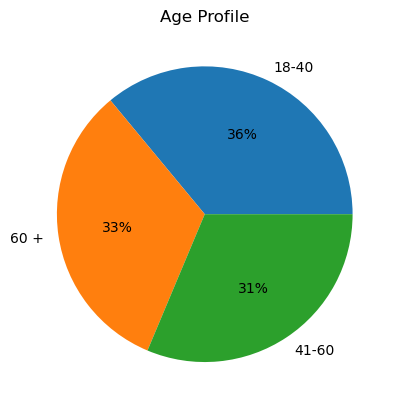

In [6]:
# Create Pie Chart for 'age_profile'

age_profile_pie = df['age_profile'].value_counts().plot.pie(title ='Age Profile', label = '', autopct=('%1.f%%'))

There is not much difference between the age categories of the clients, the highest percentage of 36% is represented by clients between 18-40 years old.

In [40]:
# Export the  Pie Chart for 'age_profile'

age_profile_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_profile_pie.png'))

## 5.2 Income Profile

In [7]:
# Create income_profile

df.loc[(df['income'] <= 50000), 'income_profile'] = '<=50k'
df.loc[(df['income'] > 50000) & (df['income'] <= 150000), 'income_profile'] = '50k - 150k'
df.loc[(df['income'] > 150000), 'income_profile'] = '150k+'
df['income_profile'].value_counts(dropna = False)

50k - 150k    24759749
150k+          4050329
<=50k          3594083
Name: income_profile, dtype: int64

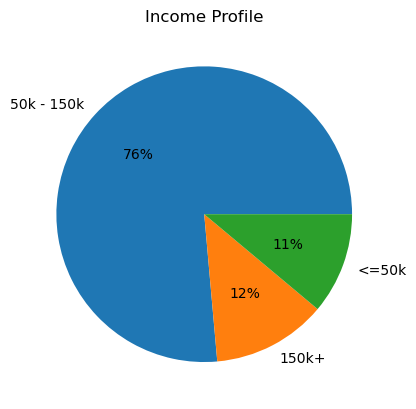

In [8]:
# Create Pie Chart for 'income_profile'

income_profile_pie = df['income_profile'].value_counts().plot.pie(title ='Income Profile', label = '', autopct=('%1.f%%'))


In [9]:
# Export the  Pie Chart for 'income_profile'

income_profile_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'income_profile_pie.png'))

### Customers in the income category of 50k-150k are the highest in number.

# 5.3 Customer Profile  based on number of dependants


In [27]:
df.loc[df['dependants_number']== 0, 'family_profile'] = 'Single Adult'
df.loc[df['dependants_number']!= 0, 'family_profile'] = 'Family'
df['family_profile'].value_counts(dropna = False)

Family          24306856
Single Adult     8097305
Name: family_profile, dtype: int64

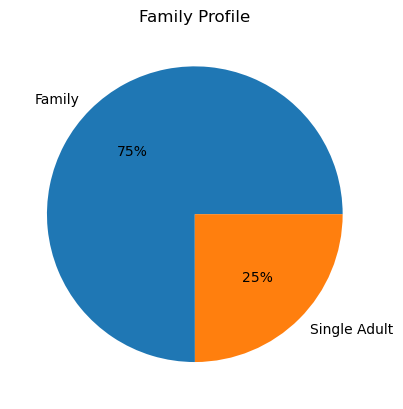

In [28]:
# Create Pie Chart for 'age_profile'

family_profile_pie = df['family_profile'].value_counts().plot.pie(title ='Family Profile', label = '', autopct=('%1.f%%'))

#### Only 25% of clients are single adults, 75% are family clients

In [30]:
# Export the Pie Chart chart by Family Profile

family_profile_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'family_profile_pie.png'))



## 5.4 Profiling day of the week

In [32]:
df['orders_day_of_week'].value_counts(dropna = False)

0    6204090
1    5660099
6    4496415
2    4213729
5    4205663
3    3840449
4    3783716
Name: orders_day_of_week, dtype: int64

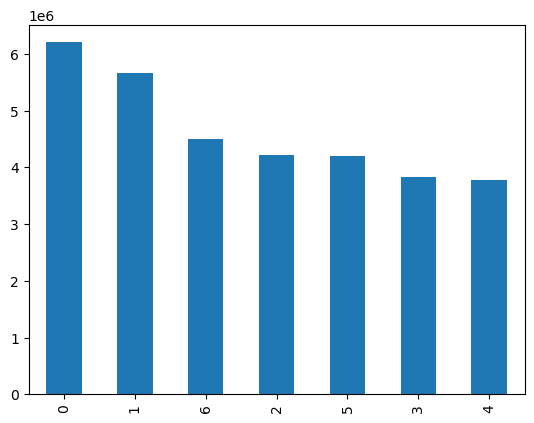

In [35]:
# Create bar chart for 'orders_day_of_week'

bar_day= df['orders_day_of_week'].value_counts().plot.bar()

### Most orders are made on Saturday and Sunday

In [36]:
# Export the Bar chart 

bar_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_day_of_the_week.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure


In [29]:
# Create a new df that include only 'prices' and 'user_id' columns
df_prices = df[['prices','user_id']]


In [30]:
# Check whether are any values above a certain threshhold in data

df_prices.loc[df_prices['prices']>100]

,prices,user_id
7805,14896.0,1519
7806,14896.0,1519
15143,14896.0,2409
20496,14896.0,3793
22487,14896.0,3819
...,...,...
32271734,14896.0,136909
32271771,14896.0,156508
32271772,14896.0,156508
32271823,14896.0,189019


In [31]:
# Mark the values for prices>100 as missing (NaNs)
df.loc[df['prices'] >100, 'prices'] = np.nan

In [32]:
df['prices'].max()

25.0

## 7.1 Summary statistics of AGE across order frequency and expenditure


In [33]:
# Summary statistics of age across order frequency and expenditure

age_sums = df.groupby(['age_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
age_sums

days_since_prior_order                  prices                  \
                               min   max       mean    min   max      mean   
age_profile                                                                  
18-40                          0.0  30.0  11.109763    1.0  25.0  7.786426   
41-60                          0.0  30.0  11.119156    1.0  25.0  7.790773   
60 +                           0.0  30.0  11.083321    1.0  25.0  7.795849   

                         
                    sum  
age_profile              
18-40        90853640.0  
41-60        79079168.0  
60 +         82489136.0

#### Customers of all age groups order at an average interval of 11 days. Customers between the ages of 18-40 contribute the most to revenue, having the highest total amount of orders.


## 7.2 Summary statistics of INCOME across order frequency and expenditure

In [37]:
# Summary statistics of age across order frequency and expenditure

age_sums = df.groupby(['income_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
age_sums

days_since_prior_order                  prices           \
                                  min   max       mean    min      max   
income_profile                                                           
150k+                             0.0  30.0  10.941355    1.0  14896.0   
50k - 150k                        0.0  30.0  11.061335    1.0  14896.0   
<=50k                             0.0  30.0  11.587220    1.0     25.0   

                                        
                     mean          sum  
income_profile                          
150k+           20.279083   82136960.0  
50k - 150k       8.569968  212190256.0  
<=50k            6.696874   24069120.0

Income profile has no influence on the frequency of purchase, 11 days being the average interval of order for all profiles. Customers with incomes of 50K-150 K contribute with the most revenue.

## 7.3 Summary statistics of FAMILY PROFILE across order frequency and expenditure

In [39]:
# Summary statistics of day of week across order frequency and expenditure

family_sums = df.groupby(['family_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
family_sums

days_since_prior_order                  prices           \
                                  min   max       mean    min      max   
family_profile                                                           
Family                            0.0  30.0  11.111821    1.0  14896.0   
Single Adult                      0.0  30.0  11.080810    1.0  14896.0   

                                       
                    mean          sum  
family_profile                         
Family          9.873128  239984704.0  
Single Adult    9.683669   78411624.0

Family profile has no influence on the frequency of purchase, 11 days being the average interval of order for all profiles. Customers with family contribute with the most revenue.

## 7.4 Summary statistics of DAY OF WEEK across order frequency and expenditure


In [38]:
# Summary statistics of day of week across order frequency and expenditure

day_of_week_sums = df.groupby(['orders_day_of_week']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
day_of_week_sums

days_since_prior_order                  prices           \
                                      min   max       mean    min      max   
orders_day_of_week                                                           
0                                     0.0  30.0  11.614866    1.0  14896.0   
1                                     0.0  30.0  11.298669    1.0  14896.0   
2                                     0.0  30.0  11.282380    1.0  14896.0   
3                                     0.0  30.0  10.874917    1.0  14896.0   
4                                     0.0  30.0  10.547594    1.0  14896.0   
5                                     0.0  30.0  10.452176    1.0  14896.0   
6                                     0.0  30.0  11.269107    1.0  14896.0   

                                           
                         mean         sum  
orders_day_of_week                         
0                    9.683657  60078280.0  
1                    9.866500  55845368.0  
2                    9.958941  41964280.0  
3                   10.021345  38486464.0  
4                    9.896636  37446060.0  
5                    9.840355  41385216.0  
6                    9.605577  43190660.0

The average number of days between each order is 10 or 11 across different days of week. Saturday is the highest revenue day across week.

# 8.  Customer Profiles by Region and Departments

## 8.1 Age Grouping by Region

In [43]:
#Creating a crosstab of the regions and age groups

crosstab_region_age = pd.crosstab(df['region'], df['age_profile'], dropna = False)

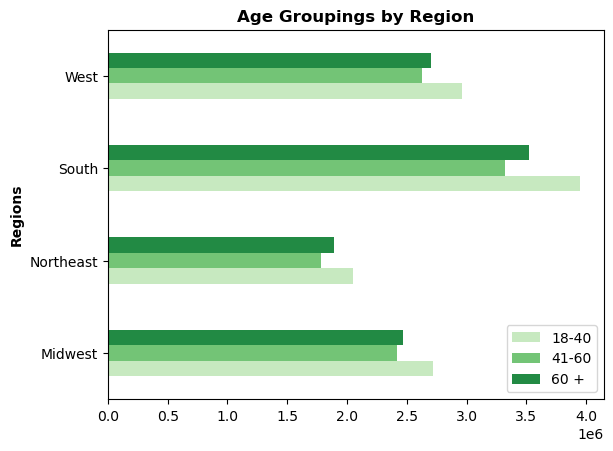

In [44]:
#Creating a stacked bar chart of the regions, divided up by the age groups

region_age = crosstab_region_age.plot(kind = 'barh', color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Age Groupings by Region', fontweight = 'bold')
plt.show()

In all regions, the largest number of customers is represented by customers between the ages of 18-40. The Southern region includes the largest number of clients.

In [47]:
# Export the  stacked bar chart of the regions, divided up by the age groups

region_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'region_age_stb.png'))

## 8.2 Age Groupings by Department

In [45]:
#Creating a crosstab of the regions and age groups

crosstab_department_age = pd.crosstab(df['department_id'], df['age_profile'], dropna = False)

In [46]:
crosstab_department_age

age_profile,18-40,41-60,60 +
department_id,,,
1,801086,699395,734262
2,13218,11371,11702
3,421442,368275,382711
4,3417016,2965656,3096619
5,57243,47920,48533
6,97977,84337,86939
7,957256,847867,883000
8,35248,30338,32130
9,312430,272072,282125


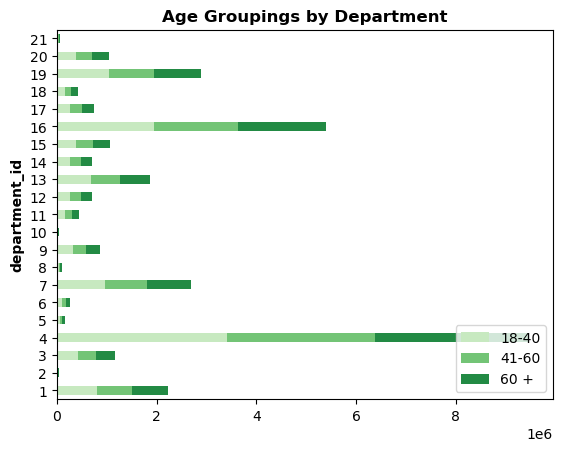

In [47]:
#Creating a stacked bar chart of the departments, divided up by the age_profile

dept_income = crosstab_department_age.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('department_id', fontweight = 'bold')
plt.title('Age Groupings by Department', fontweight = 'bold')
plt.show()

Produce (4) is the highest category in department followed by Dairy Eggs (16) across the age groups.

In [53]:
# Export the  stacked bar chart by department

dept_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'dept_income_stb.png'))

## 8.3 Family Profile  by Region

In [48]:
#Creating a crosstab of the regions and family status

crosstab_region_family = pd.crosstab(df['region'], df['family_profile'], dropna = False)

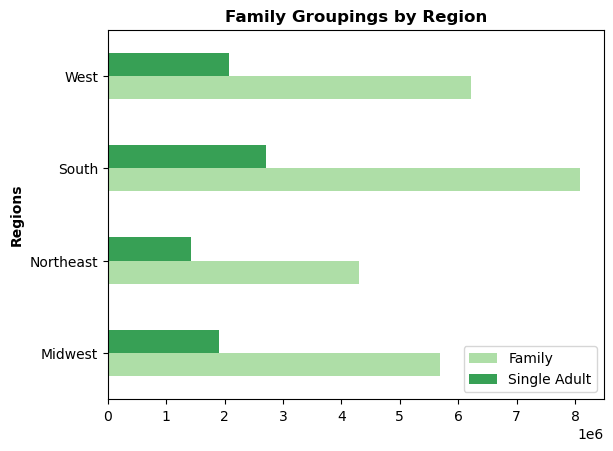

In [49]:
#Creating a stacked bar chart of the regions, divided up by the family groups

region_family = crosstab_region_family.plot(kind = 'barh', color = sns.color_palette('Greens', 2))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Family Groupings by Region', fontweight = 'bold')
plt.show()

Customers with family from Southern region represents the highest category.

In [58]:
# Export the stacked bar chart of the regions, divided up by the family groups

region_family.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'region_family_stb.png'))


## 8.4 Family Profile by Department

In [50]:
#Creating a crosstab of the departments and family status

crosstab_department_family = pd.crosstab(df['department_id'], df['family_profile'], dropna = False)

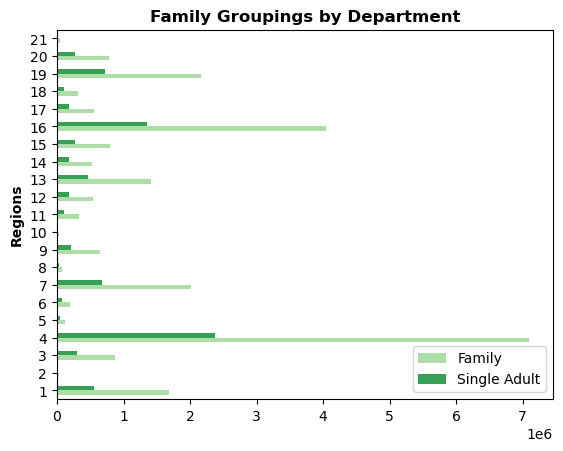

In [51]:
#Creating a stacked bar chart of the department, divided up by the family groups

department_family = crosstab_department_family.plot(kind = 'barh', color = sns.color_palette('Greens', 2))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Family Groupings by Department', fontweight = 'bold')
plt.show()

In [61]:
# Export the stacked bar chart of the department, divided up by the family groups

department_family.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'department_family_stb.png'))

## 8.5 Income Profile by Region

In [53]:
#Creating a crosstab of the regions and income profile

crosstab_region_income = pd.crosstab(df['region'], df['income_profile'], dropna = False)

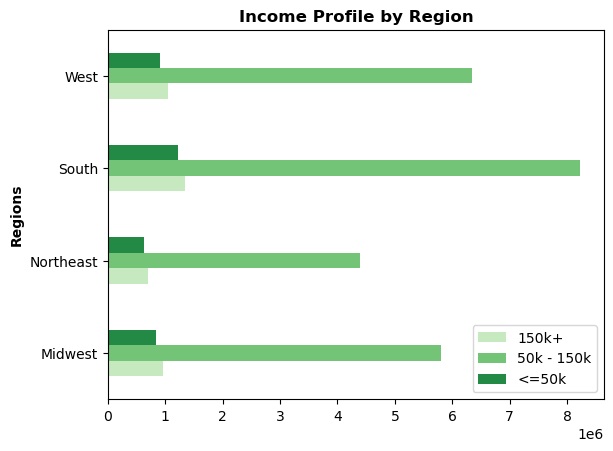

In [55]:
#Creating a stacked bar chart of the regions, divided up by the income profile

region_income = crosstab_region_income.plot(kind = 'barh', color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Income Profile by Region', fontweight = 'bold')
plt.show()

In [59]:
# Export the stacked bar chart of the region, divided up by the income profile

region_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'region_income_stb.png'))

## 8.6 Income Profile by Department

In [65]:
#Creating a crosstab of the departments and income profile

crosstab_department_income = pd.crosstab(df['department_id'], df['income_profile'], dropna = False)


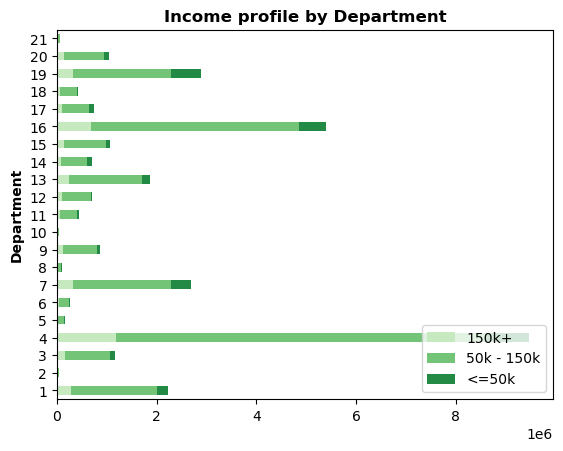

In [69]:
#Creating a stacked bar chart of the department, divided up by the income profile

department_income = crosstab_department_income.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Income profile by Department', fontweight = 'bold')
plt.show()

In [70]:
# Export the stacked bar chart of the region, divided up by the income profile

department_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'department_income_stb.png'))

## 8.7 Orders Days of Week Profile by Region

In [64]:
#Creating a crosstab of the regions and days of week profile

crosstab_region_days = pd.crosstab(df['region'], df['orders_day_of_week'], dropna = False)

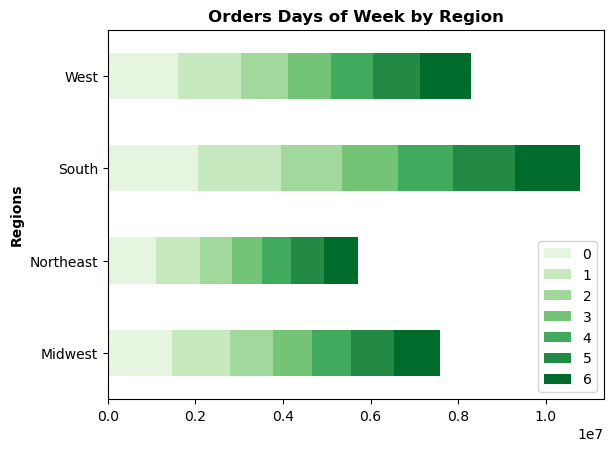

In [71]:
#Creating a stacked bar chart of the department, divided up by the income profile

region_day_of_week = crosstab_region_days.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 7))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Orders Days of Week by Region', fontweight = 'bold')
plt.show()

Saturday and Sunday in Southern region are the days with the most oreders.

In [72]:
# Export the stacked bar chart of the region, divided up by day of the week

region_day_of_week.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'region_day_of_week_stb.png'))

## 8.8  Orders Days of Week Profile by Department

In [73]:
#Creating a crosstab of the regions and days of week profile

crosstab_department_days = pd.crosstab(df['department_id'], df['orders_day_of_week'], dropna = False)

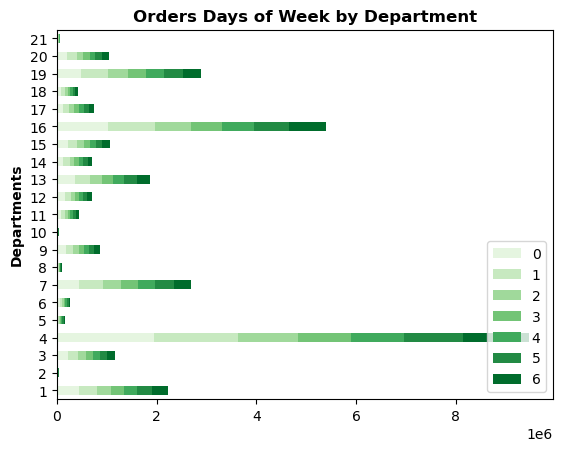

In [75]:
#Creating a stacked bar chart of the department, divided up by days of week profile

department_day_of_week = crosstab_department_days.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 7))
plt.legend(loc='lower right')
plt.ylabel('Departments', fontweight = 'bold')
plt.title('Orders Days of Week by Department', fontweight = 'bold')
plt.show()

Customers purchase the most products in produce department(4) followed by dairy eggs(16) on Saturday.

In [76]:
# Export the stacked bar chart of the department, divided up by day of the week

department_day_of_week.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'department_day_of_week_stb.png'))

In [77]:
# Export data to pkl

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))